In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

In [64]:
rr = pd.read_csv('time_series_19-covid-Recovered.csv', sep=',')
rr2 = rr.set_index(['Country/Region','Province/State'])
rr2.head(3)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Thailand,NaN,15.0000,101.0000,0,0,0,0,2,2,5,5,...,33,34,34,35,35,35,35,41,42,42
Japan,NaN,36.0000,138.0000,0,0,0,0,1,1,1,1,...,101,118,118,118,118,118,144,144,144,150
Singapore,NaN,1.2833,103.8333,0,0,0,0,0,0,0,0,...,78,96,96,97,105,105,109,114,114,114


In [65]:
# read csv:
#df = pd.read_csv('time_series_19-covid-Confirmed.csv', sep=';', index_col=0,keep_default_na=False).T
df = pd.read_csv('time_series_19-covid-Confirmed.csv', sep=',')
# re-set the index (row headers):
df2 = df.set_index(['Country/Region','Province/State'])
df2.head(3)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Thailand,NaN,15.0000,101.0000,2,3,5,7,8,8,14,14,...,53,59,70,75,82,114,147,177,212,272
Japan,NaN,36.0000,138.0000,2,1,2,2,4,4,7,7,...,581,639,639,701,773,839,825,878,889,924
Singapore,NaN,1.2833,103.8333,0,1,3,3,4,5,7,7,...,160,178,178,200,212,226,243,266,313,345


In [66]:
dfX = df2-rr2
dfX.head(3)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0,0,0,0,0,0,0,0,...,5,7,7,7,11,16,20,21,21,21
Albania,NaN,0.0,0.0,0,0,0,0,0,0,0,0,...,10,12,23,33,38,42,51,55,59,64
Algeria,NaN,0.0,0.0,0,0,0,0,0,0,0,0,...,20,20,16,18,25,36,42,48,62,55


In [67]:
#remove spurious last column:
df2b = dfX.loc[:, ~df2.columns.str.contains('^Unnamed')]
# transpose:
df3 = df2b.T
df3.head(5)

Country/Region Afghanistan Albania Algeria Andorra Antigua and Barbuda  \
Province/State         NaN     NaN     NaN     NaN                 NaN   
Lat                    0.0     0.0     0.0     0.0                 0.0   
Long                   0.0     0.0     0.0     0.0                 0.0   
1/22/20                0.0     0.0     0.0     0.0                 0.0   
1/23/20                0.0     0.0     0.0     0.0                 0.0   
1/24/20                0.0     0.0     0.0     0.0                 0.0   

Country/Region Argentina Armenia                    Australia  \
Province/State       NaN     NaN Australian Capital Territory   
Lat                  0.0     0.0                          0.0   
Long                 0.0     0.0                          0.0   
1/22/20              0.0     0.0                          0.0   
1/23/20              0.0     0.0                          0.0   
1/24/20              0.0     0.0                          0.0   

Country/Region                                        ... United Kingdom  \
Province/State From Diamond Princess New South Wales  ... Cayman Islands   
Lat                              0.0             0.0  ...            0.0   
Long                             0.0             0.0  ...            0.0   
1/22/20                          0.0             0.0  ...            0.0   
1/23/20                          0.0             0.0  ...            0.0   
1/24/20                          0.0             0.0  ...            0.0   

Country/Region                                                     Uruguay  \
Province/State Channel Islands Gibraltar Montserrat United Kingdom     NaN   
Lat                        0.0       0.0        0.0            0.0     0.0   
Long                       0.0       0.0        0.0            0.0     0.0   
1/22/20                    0.0       0.0        0.0            0.0     0.0   
1/23/20                    0.0       0.0        0.0            0.0     0.0   
1/24/20                    0.0       0.0        0.0            0.0     0.0   

Country/Region Uzbekistan Venezuela Vietnam Zambia  
Province/State        NaN       NaN     NaN    NaN  
Lat                   0.0       0.0     0.0    0.0  
Long                  0.0       0.0     0.0    0.0  
1/22/20               0.0       0.0     0.0    0.0  
1/23/20               0.0       0.0     2.0    0.0  
1/24/20               0.0       0.0     2.0    0.0  

[5 rows x 468 columns]

In [68]:
# remove Lat/Long rows
df4 = df3.drop(['Lat','Long'])
df4.tail(3)

Country/Region Afghanistan Albania Algeria Andorra Antigua and Barbuda  \
Province/State         NaN     NaN     NaN     NaN                 NaN   
3/17/20               21.0    55.0    48.0    38.0                 1.0   
3/18/20               21.0    59.0    62.0    38.0                 1.0   
3/19/20               21.0    64.0    55.0    52.0                 1.0   

Country/Region Argentina Armenia                    Australia  \
Province/State       NaN     NaN Australian Capital Territory   
3/17/20             65.0    77.0                          2.0   
3/18/20             76.0    83.0                          3.0   
3/19/20             94.0   114.0                          4.0   

Country/Region                                        ... United Kingdom  \
Province/State From Diamond Princess New South Wales  ... Cayman Islands   
3/17/20                          0.0           206.0  ...            1.0   
3/18/20                          0.0           263.0  ...            1.0   
3/19/20                          0.0           303.0  ...            3.0   

Country/Region                                                     Uruguay  \
Province/State Channel Islands Gibraltar Montserrat United Kingdom     NaN   
3/17/20                    6.0       2.0        0.0         1898.0    29.0   
3/18/20                    6.0       6.0        1.0         2561.0    50.0   
3/19/20                   11.0       8.0        1.0         2624.0    79.0   

Country/Region Uzbekistan Venezuela Vietnam Zambia  
Province/State        NaN       NaN     NaN    NaN  
3/17/20              10.0      33.0    50.0    0.0  
3/18/20              15.0      36.0    59.0    2.0  
3/19/20              23.0      42.0    69.0    2.0  

[3 rows x 468 columns]

In [69]:
# convert index to dateTime:
df4.index = pd.DatetimeIndex(df4.index)
df4.head(3)

Country/Region Afghanistan Albania Algeria Andorra Antigua and Barbuda  \
Province/State         NaN     NaN     NaN     NaN                 NaN   
2020-01-22             0.0     0.0     0.0     0.0                 0.0   
2020-01-23             0.0     0.0     0.0     0.0                 0.0   
2020-01-24             0.0     0.0     0.0     0.0                 0.0   

Country/Region Argentina Armenia                    Australia  \
Province/State       NaN     NaN Australian Capital Territory   
2020-01-22           0.0     0.0                          0.0   
2020-01-23           0.0     0.0                          0.0   
2020-01-24           0.0     0.0                          0.0   

Country/Region                                        ... United Kingdom  \
Province/State From Diamond Princess New South Wales  ... Cayman Islands   
2020-01-22                       0.0             0.0  ...            0.0   
2020-01-23                       0.0             0.0  ...            0.0   
2020-01-24                       0.0             0.0  ...            0.0   

Country/Region                                                     Uruguay  \
Province/State Channel Islands Gibraltar Montserrat United Kingdom     NaN   
2020-01-22                 0.0       0.0        0.0            0.0     0.0   
2020-01-23                 0.0       0.0        0.0            0.0     0.0   
2020-01-24                 0.0       0.0        0.0            0.0     0.0   

Country/Region Uzbekistan Venezuela Vietnam Zambia  
Province/State        NaN       NaN     NaN    NaN  
2020-01-22            0.0       0.0     0.0    0.0  
2020-01-23            0.0       0.0     2.0    0.0  
2020-01-24            0.0       0.0     2.0    0.0  

[3 rows x 468 columns]

In [70]:
# extract regions we are interested in:
df6 = df4.loc[:,[
    ('China','Hubei'),
    ('China','Beijing'),
    ('Germany',''),
    ('Italy',''),
    ('Japan',''),
    ('France','France'),
#    ('China','Anhui'),
    ('Switzerland',''),
    ('Singapore',''),
    ('Korea, South',''),
    ('Poland',''),
    ("US","Washington"),
    ("Spain",""),
    ("Austria","")
]]
df6.tail(3)

Country/Region    China          Germany    Italy  Japan   France Switzerland  \
Province/State    Hubei Beijing      NaN      NaN    NaN   France         NaN   
2020-03-17      11796.0    87.0   9190.0  28565.0  734.0   7640.0      2696.0   
2020-03-18      10873.0    91.0  12222.0  31688.0  745.0   9031.0      3013.0   
2020-03-19      10118.0   100.0  15207.0  36595.0  774.0  10859.0      4060.0   

Country/Region Singapore Korea, South Poland         US    Spain Austria  
Province/State       NaN          NaN    NaN Washington      NaN     NaN  
2020-03-17         152.0       6913.0  225.0     1075.0  10720.0  1331.0  
2020-03-18         199.0       6873.0  238.0     1014.0  12829.0  1637.0  
2020-03-19         231.0       7025.0  354.0     1376.0  16856.0  2004.0

In [71]:
# divide by population density.  first had this via separate csv files, 
# but the "countries" are not stable in the upstream data
df6.loc[:,('China','Beijing')] /= 22.
df6.loc[:,('China','Hubei')] /= 60.
df6.loc[:,('Japan',np.nan)] /= 126.8
df6.loc[:,('Korea, South',np.nan)] /= 52.
df6.loc[:,('Singapore',np.nan)] /= 5.85
df6.loc[:,('France','France')] /= 67.
df6.loc[:,('Germany',np.nan)] /= 82.79
df6.loc[:,('Italy',np.nan)] /= 60.5
df6.loc[:,('Switzerland',np.nan)] /= 8.57
df6.loc[:,('Poland',np.nan)] /= 4.
df6.loc[:,('US','Washington')] /= 7.6
#df6.loc[:,("US","King County, WA")] /= 2.2
df6.loc[:,("Spain",np.nan)] /= 47.
df6.loc[:,("Austria",np.nan)] /= 8.8
df6.tail(3)

Country/Region       China               Germany       Italy     Japan  \
Province/State       Hubei   Beijing         NaN         NaN       NaN   
2020-03-17      196.600000  3.954545  111.003744  472.148760  5.788644   
2020-03-18      181.216667  4.136364  147.626525  523.768595  5.875394   
2020-03-19      168.633333  4.545455  183.681604  604.876033  6.104101   

Country/Region      France Switzerland  Singapore Korea, South Poland  \
Province/State      France         NaN        NaN          NaN    NaN   
2020-03-17      114.029851  314.585764  25.982906   132.942308  56.25   
2020-03-18      134.791045  351.575263  34.017094   132.173077  59.50   
2020-03-19      162.074627  473.745624  39.487179   135.096154  88.50   

Country/Region          US       Spain     Austria  
Province/State  Washington         NaN         NaN  
2020-03-17      141.447368  228.085106  151.250000  
2020-03-18      133.421053  272.957447  186.022727  
2020-03-19      181.052632  358.638298  227.727273

In [72]:
# time-shifted Hubei values:
hb = df6["China","Hubei"]
hb.index = pd.date_range(start="2020-03-07",periods=hb.size)
hb.name=("China","Hubei time-shifted")
hb.tail(3)

2020-05-01    196.600000
2020-05-02    181.216667
2020-05-03    168.633333
Freq: D, Name: (China, Hubei time-shifted), dtype: float64

In [73]:
df6b = pd.concat([df6,hb],axis=1) #.fillna(value=0)
# mar/12 data looks faulty especially in Europe:
df6b.drop(index=pd.to_datetime('2020-03-12'),inplace=True)
df6b.loc['2020-03-10':'2020-03-15',:]

Country/Region       China              Germany       Italy     Japan  \
Province/State       Hubei   Beijing        NaN         NaN       NaN   
2020-03-10      333.616667  4.954545  17.381326  155.785124  3.785489   
2020-03-11      310.650000  4.954545  22.744293  188.710744  4.108833   
2020-03-13      270.550000  4.272727  43.833796  268.115702  4.597792   
2020-03-14      247.166667  4.000000  54.825462  317.206612  5.165615   
2020-03-15      225.100000  4.045455  69.440754  370.446281  5.686120   

Country/Region     France Switzerland  Singapore Korea, South Poland  \
Province/State     France         NaN        NaN          NaN    NaN   
2020-03-10      26.447761   56.942824  14.017094   139.730769   5.50   
2020-03-11      33.865672   75.612602  14.017094   143.596154   7.75   
2020-03-13      54.462687  132.438740  17.606838   143.634615  17.00   
2020-03-14      66.522388  158.109685  18.290598   145.692308  25.75   
2020-03-15      66.970149  256.242707  20.683761   147.153846  29.75   

Country/Region         US       Spain    Austria              China  
Province/State Washington         NaN        NaN Hubei time-shifted  
2020-03-10      35.000000   35.382979  20.227273          12.150000  
2020-03-11      48.026316   44.553191  27.500000          16.933333  
2020-03-13      74.605263  107.212766  56.590909          57.900000  
2020-03-14      75.131579  124.978723  73.750000          57.766667  
2020-03-15      84.473684  154.914894  97.045455          80.216667

In [18]:
germany = df6b['Germany']

In [25]:
fit = pd.Series(0.3*np.exp(np.arange(0,30,1)*np.log(2.)/2.8))
fit.index = pd.date_range(start="2020-02-22",periods=fit.size)

In [26]:
combined = pd.concat([germany,fit],axis=1)

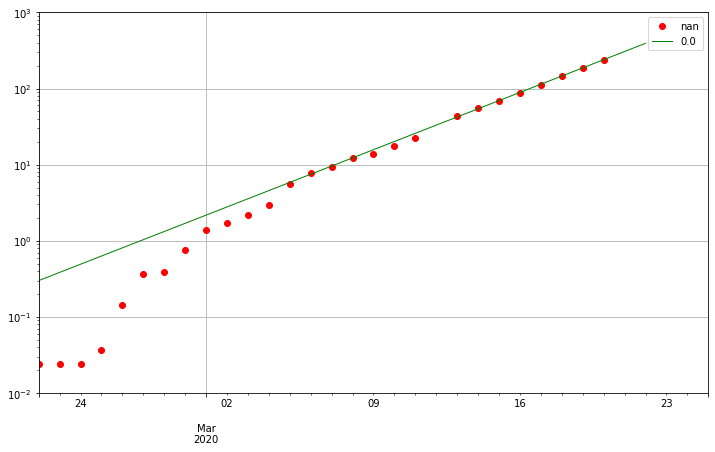

In [21]:
plt.close('all')
plt.rcParams['figure.figsize']=[12,7]
default_cycler = (cycler(color=['r', 'g', 'b', 'y']) +
                  cycler(linestyle=['', '-', ':', '-.']) +
                  cycler(marker=['o','','','']))
plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=default_cycler)
combined.plot(kind='line',
                     logy=True,ylim=(0.01,1000),xlim=("2020-02-22","2020-03-25"),
                    grid=True)

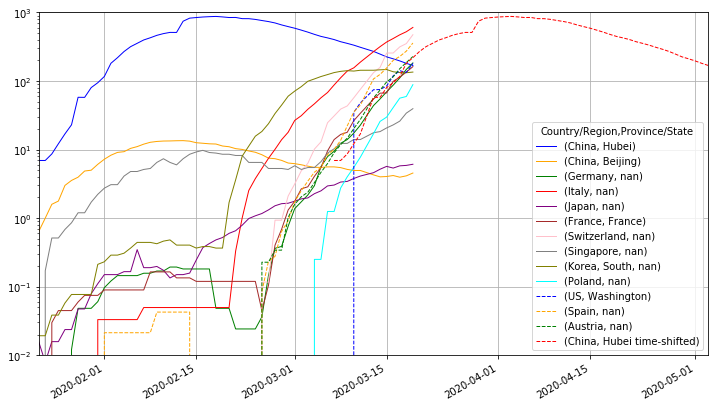

In [78]:
default_cycler = (cycler(color=['blue','orange','green','red','purple','brown','pink'
                                ,'gray','olive','cyan',
                               'blue','orange','green','red','purple','brown','pink'
                                ,'gray','olive','cyan']) +
                  cycler(linestyle=['-','-','-','-','-','-','-','-','-','-',
                                   '--','--','--','--','--','--','--','--','--','--']) +
                  cycler(marker=['','','','','','','','','','','','','','','','','','','','']))
plt.rc('axes', prop_cycle=default_cycler)
df6b.plot(kind='line',logy=True,ylim=(0.01,1000),grid=True)

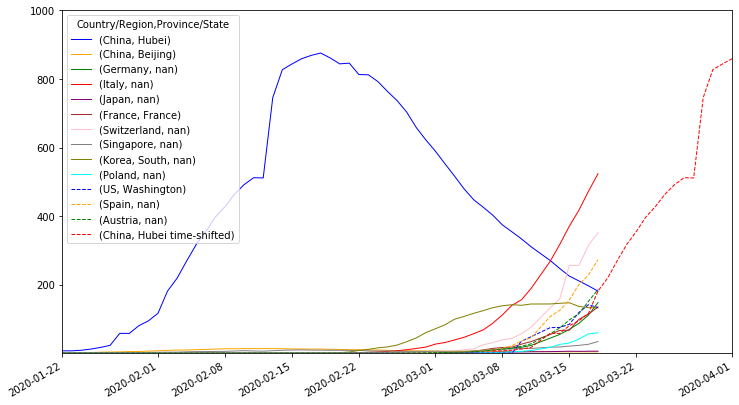

In [17]:
df6b.plot(kind='line',ylim=(0.01,1000),xlim=("2020-01-22","2020-04-01"))

In [ ]:
df6.loc[:,('Poland',np.nan)].to_string()

In [ ]:
df6.loc[:,('Poland',np.nan)]

In [ ]:
df5.loc[:,('Mainland China','Anhui')] /= 9999999.
df5.head(3)

In [ ]:
df5.to_csv("all.csv")

In [ ]:
df6['idx'] = df6.reset_index().index
df6.tail(3)

In [ ]:
df6.to_csv("reduced.csv",sep='\t',header=False)

In [ ]:
df6.iterrows?

In [ ]:
hb = df6["Mainland China"]["Hubei"]
hb.index = pd.date_range(start="2020-02-22",periods=hb.size)
hb.head(3)

In [ ]:
hb.index = pd.DatetimeIndex?

In [ ]:
pd.date_range(start="2020-01-22",periods=5)

In [ ]:
fit = pd.Series(np.exp(np.arange(0,10,1)/8))
fit.index = pd.date_range(start="2020-02-22",periods=fit.size)
fit

In [ ]:
3.9*np.log(10.)